<a href="https://colab.research.google.com/github/ATuLa0/creditcard_fraud_detection_4model_ML/blob/main/creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import missingno as msno
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report,roc_curve, auc
from tensorflow import keras

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
print(df.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Trực quan hóa dữ liệu

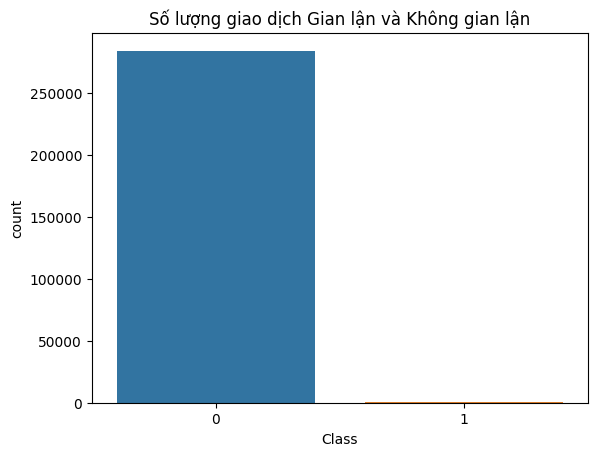

In [ ]:
sns.countplot(x='Class', data=df)
plt.title('Số lượng giao dịch Gian lận và Không gian lận')
plt.show()

In [ ]:
class_counts = df['Class'].value_counts(normalize=True) * 100

# In kết quả dưới dạng DataFrame
result = pd.DataFrame({'Class': class_counts.index, 'Percentage': class_counts.values})
print(result)

   Class  Percentage
0      0   99.827251
1      1    0.172749


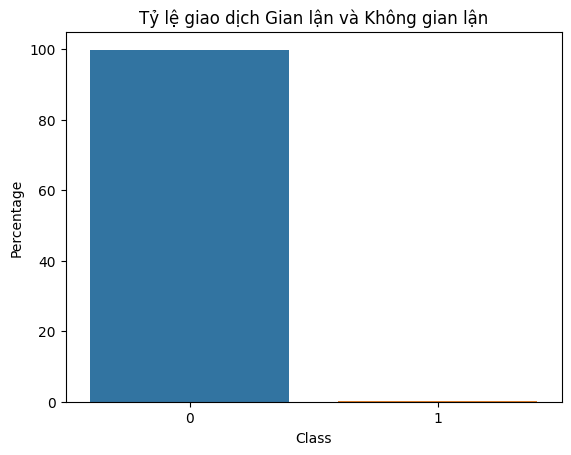

In [ ]:
df_fraud_percentage = pd.DataFrame(result)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Tỷ lệ giao dịch Gian lận và Không gian lận')
plt.show()

Tập dữ liệu trên bị mất cân bằng nghiêm trọng, số lượng không gian lận (label = 0) chiếm hơn 99,8% trên tập dữ liệu.

# Chuẩn hóa Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Tách cột 'Class' ra khỏi DataFrame
class_data = df['Class']
df = df.drop('Class', axis=1)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Thêm cột 'Class' trở lại DataFrame
df_scaled['Class'] = class_data

In [ ]:
df_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,0
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,0
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,0
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,0


# Chia data train và data test cho mô hình

In [ ]:
X = df_scaled.drop(columns='Class',axis=1)
Y = df_scaled['Class']
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=101)

# Cân bằng dữ liệu cho tập train: Over Sampling sử dụng SMOTE
- Cân bằng SMOTE sau khi chia data và chỉ sử dụng trên data train nếu không SMOTE sẽ tạo ra dữ liệu ảo trên tập test khi đó hiệu suất của mô hình sẽ không còn chính xác do dữ liệu test bị thay đổi không còn nguyên vẹn.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)
print('Số lượng mẫu sau khi SMOTEN:', X_train_smote.shape[0])

Số lượng mẫu sau khi SMOTEN: 454912


# Logistic

In [ ]:
logist = LogisticRegression()
logist.fit(X_train_smote,Y_train_smote)

LogisticRegression()

In [ ]:
y_pred_logist = logist.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred_logist)
cnf_matrix

array([[55427,  1432],
       [    9,    94]])

Text(0.5, 427.9555555555555, 'Predicted label')

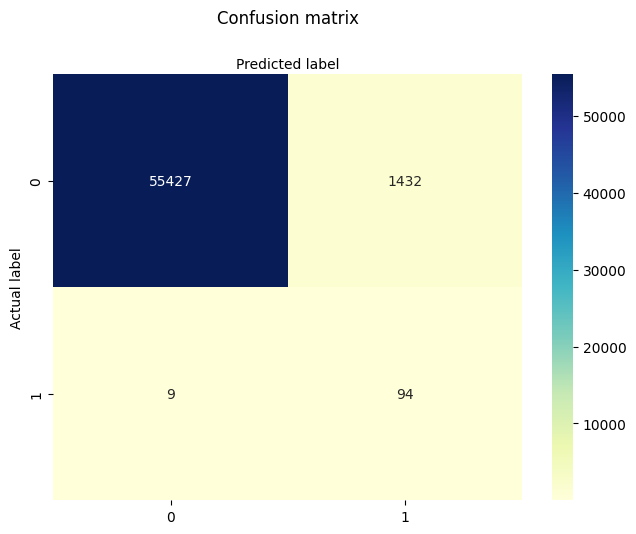

In [ ]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy: ",logist.score(X_test,Y_test))
print(classification_report(Y_test, y_pred_logist))

Accuracy:  0.9747024332010814
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56859
           1       0.06      0.91      0.12       103

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_smote,Y_train_smote)
Y_pred_rfc = rfc.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_rfc)
cnf_matrix

array([[56851,     8],
       [   17,    86]])

Text(0.5, 427.9555555555555, 'Predicted label')

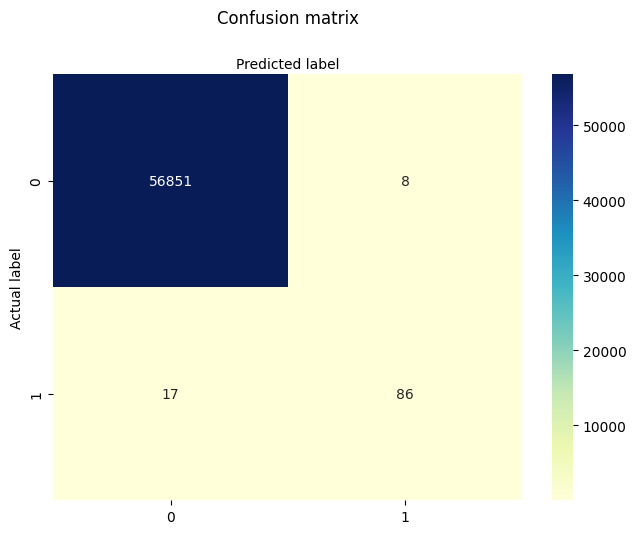

In [ ]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy: ",metrics.accuracy_score(Y_test,Y_pred_rfc))
print(classification_report(Y_test, Y_pred_rfc))

Accuracy:  0.9995611109160493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.91      0.83      0.87       103

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



# Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_smote,Y_train_smote)

GaussianNB()

In [ ]:
Y_pred_navie = nb.predict(X_test)


In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_navie)
cnf_matrix

array([[55449,  1410],
       [   14,    89]])

Text(0.5, 427.9555555555555, 'Predicted label')

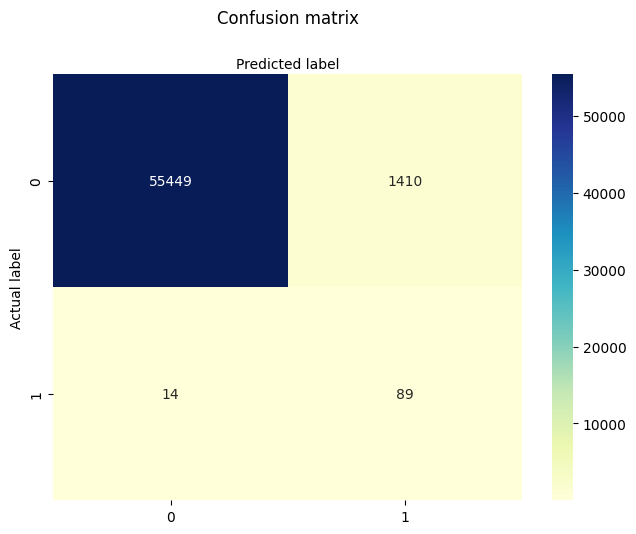

In [ ]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy: ",metrics.accuracy_score(Y_test,Y_pred_navie))
print(classification_report(Y_test, Y_pred_navie))

Accuracy:  0.9750008777781679
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56859
           1       0.06      0.86      0.11       103

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train_smote,Y_train_smote)

DecisionTreeClassifier()

In [ ]:
Y_pred_dtree = dtree.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_dtree)
cnf_matrix

array([[56742,   117],
       [   22,    81]])

Text(0.5, 427.9555555555555, 'Predicted label')

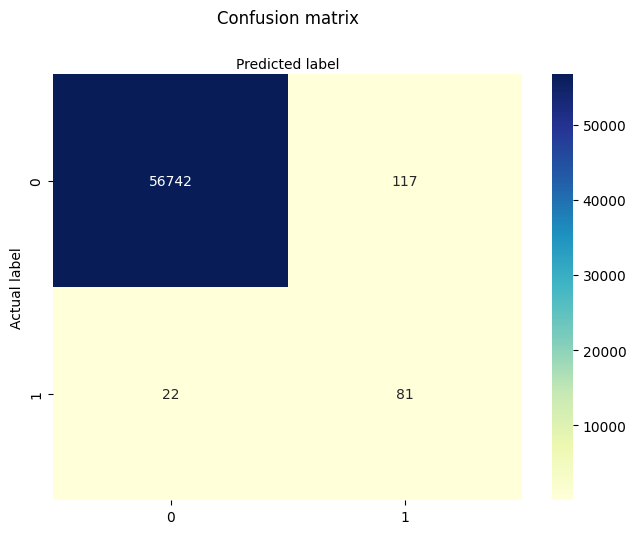

In [ ]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy: ",metrics.accuracy_score(Y_test,Y_pred_dtree))
print(classification_report(Y_test, Y_pred_dtree))

Accuracy:  0.997559776693234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.41      0.79      0.54       103

    accuracy                           1.00     56962
   macro avg       0.70      0.89      0.77     56962
weighted avg       1.00      1.00      1.00     56962



> Logistic:
Accuracy: 0.97
Classification Report:
- Class 0: Precision (1.00), Recall (0.97), F1-score (0.99).
- Class 1: Precision (0.06) và Recall (0.91), F1-score (0.12).
- Confusion Matrix: True Positive(55427), False Negative(1432), False Positive(9), True Negative(94).
- Nhận xét: Mô hình này có hiệu suất khá cao với xác suất phát hiện chính xác các gian lận là (0.91) nhưng vẫn có nhiều phát hiện sai về các giao dịch hợp lệ bị cho là có gian lận.

> Random Forest:
Accuracy: 0.99
Classification Report:
- Class 0: Precision (1.00), Recall (1.00), F1-score (1.00).
- Class 1: Precision (0.91) và Recall (0.83), F1-score (0.87).
- Confusion Matrix: True Positive(56851), False Negative(8), False Positive(17), True Negative(86).
- Nhận xét: Mô hình này có hiệu suất tương đối ổn xác suất phát hiện chính xác các giao dịch gian lận là (0.83) và ít nhầm lẫn trong việc xác định các giao dịch hợp lệ (không có nhiều phát hiện nhầm của giao dịch hợp lệ thành giao dịch gian lận).

> Navie Bayes:
Accuracy: 0.97
Classification Report:
- Class 0: Precision (1.00), Recall (0.98), F1-score (0.99).
- Class 1: Precision (0.06) và Recall (0.86), F1-score (0.11).
- Confusion Matrix: True Positive(55449), False Negative(1410), False Positive(14), True Negative(89).
- Nhận xét: Mô hình này có hiệu suất khá cao với xác suất phát hiện chính xác các gian lận là (0.86) nhưng vẫn có nhiều phát hiện sai về các giao dịch hợp lệ bị cho là có gian lận.

> Decision Tree:
Accuracy: 0.99
Classification Report:
- Class 0: Precision (1.00), Recall (1.00), F1-score (1.00).
- Class 1: Precision (0.41) và Recall (0.79), F1-score (0.54).
- Confusion Matrix: True Positive(56742), False Negative(117), False Positive(22), True Negative(81).
- Nhận xét: Mô hình này có hiệu suất tạm ổn với xác suất phát hiện chính xác các gian lận là (0.79) nhưng vẫn có nhiều phát hiện sai về các giao dịch hợp lệ bị cho là có gian lận.

# Biểu đồ ROC

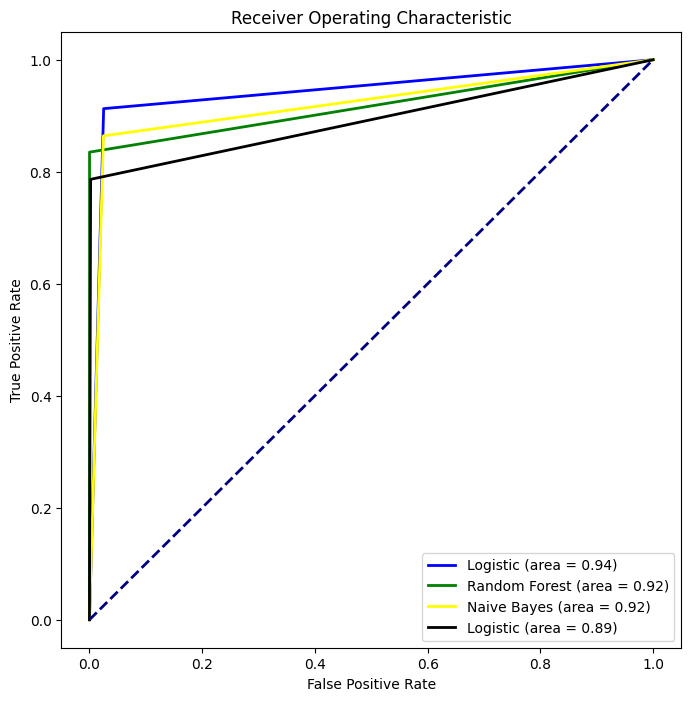

In [ ]:
plt.figure(figsize=(8, 8))

# Logistic
fpr_logistic, tpr_logistic, _ = roc_curve(Y_test,y_pred_logist)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label='Logistic (area = {:.2f})'.format(roc_auc_logistic))

# RFC
fpr_sfc, tpr_sfc, _ = roc_curve(Y_test, Y_pred_rfc)
roc_auc_sfc = auc(fpr_sfc, tpr_sfc)
plt.plot(fpr_sfc, tpr_sfc, color='green', lw=2, label='Random Forest (area = {:.2f})'.format(roc_auc_sfc))

# Naive Bayes
fpr_nv, tpr_nv, _ = roc_curve(Y_test, Y_pred_navie)
roc_auc_nv = auc(fpr_nv, tpr_nv)
plt.plot(fpr_nv, tpr_nv, color='yellow', lw=2, label='Naive Bayes (area = {:.2f})'.format(roc_auc_nv))

# Decision Tree
fpr_dtree, tpr_dtree, _ = roc_curve(Y_test,Y_pred_dtree)
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)
plt.plot(fpr_dtree, tpr_dtree, color='black', lw=2, label='Decision Tree (area = {:.2f})'.format(roc_auc_dtree))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# Kết luận:

- Ta cần quan tâm tới các phát hiện gian lận nên điểm recall của Class 1 của các mô hình là lựa chọn phù hợp với yêu cầu. Các mô hình trên phát hiện khá tốt các trường hợp gian lận khác tốt đặc biệt là Logistic Regression cho ra điểm Recall với việc phát hiện gian lận là cao nhất (0.91) tuy có sai sót khá nhiều với việc xác định các giao dịch hợp lệ thành gian lận.
- Trong số các mô hình cho thấy Random Forest hoạt động hiệu quả hơn các mô hình khác, độ chính xác khi dự đoán các label 1 không có như Logistic nhưng về tổng mức độ chính xác thì hơn hẳn 3 mô hình còn lại.
- Nếu cần rà soát kĩ lưỡng có thể chọn Logistic Model kiểm tra gian lận nhưng sẽ có sai sót về việc nhận nhầm người không gian lận thành gian lận.